In [2]:
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\shsubham\\program\\DATA\\hackerearth\\planecrash\\train.csv")

In [4]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [5]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [7]:
df.shape

(10000, 12)

In [8]:
df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [9]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [10]:
df.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [11]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [12]:
df['Severity'].value_counts(normalize=True)

Highly_Fatal_And_Damaging                  0.3049
Significant_Damage_And_Serious_Injuries    0.2729
Minor_Damage_And_Injuries                  0.2527
Significant_Damage_And_Fatalities          0.1695
Name: Severity, dtype: float64

In [13]:
df.nunique()


Severity                       4
Safety_Score                1175
Days_Since_Inspection         23
Total_Safety_Complaints       44
Control_Metric               952
Turbulence_In_gforces       1117
Cabin_Temperature            950
Accident_Type_Code             7
Max_Elevation               4191
Violations                     6
Adverse_Weather_Metric      4258
Accident_ID                10000
dtype: int64

In [14]:
df['Accident_Type_Code'].value_counts()

4    2057
2    1791
3    1752
7    1276
6    1215
1    1171
5     738
Name: Accident_Type_Code, dtype: int64

In [15]:
#for 
#    print(df.groupby('class').size())

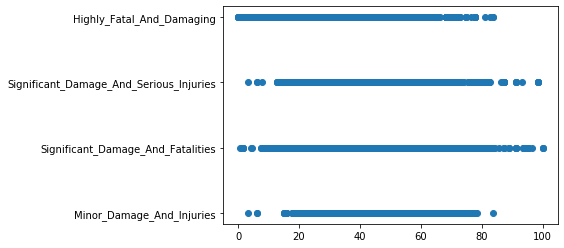

In [16]:
plt.scatter(df['Safety_Score'],df['Severity'])

In [17]:
#df.hist(figsize=(25,20))

Safety_Score                 AxesSubplot(0.125,0.821923;0.0596154x0.0580769)
Days_Since_Inspection      AxesSubplot(0.196538,0.821923;0.0596154x0.0580...
Total_Safety_Complaints    AxesSubplot(0.268077,0.821923;0.0596154x0.0580...
Control_Metric             AxesSubplot(0.339615,0.821923;0.0596154x0.0580...
Turbulence_In_gforces      AxesSubplot(0.411154,0.821923;0.0596154x0.0580...
Cabin_Temperature          AxesSubplot(0.482692,0.821923;0.0596154x0.0580...
Accident_Type_Code         AxesSubplot(0.554231,0.821923;0.0596154x0.0580...
Max_Elevation              AxesSubplot(0.625769,0.821923;0.0596154x0.0580...
Violations                 AxesSubplot(0.697308,0.821923;0.0596154x0.0580...
Adverse_Weather_Metric     AxesSubplot(0.768846,0.821923;0.0596154x0.0580...
Accident_ID                AxesSubplot(0.840385,0.821923;0.0596154x0.0580...
dtype: object

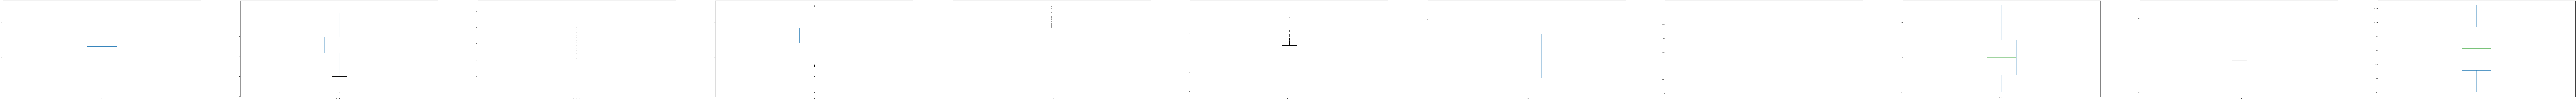

In [18]:
df.plot(kind='box', subplots=True, layout=(11,11), sharex=False, sharey=False, figsize=(512,256))

In [19]:
from pandas.plotting import scatter_matrix

In [20]:
#scatter_matrix(df,figsize=(50,40))

In [21]:
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le_Severity=LabelEncoder()
le_Severity.fit(df['Severity'])
df['Severity']=le_Severity.transform(df['Severity'])

In [24]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [26]:
df_1=df.set_index('Accident_ID')

In [27]:
df_1.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [28]:
y=df_1['Severity']


In [29]:
y.head()

Accident_ID
7570     1
12128    1
2181     2
5946     3
9054     2
Name: Severity, dtype: int32

In [30]:
ind=np.arange(1,11).tolist()

In [31]:
X=df_1.iloc[:,ind]

In [32]:
X.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
7570,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import warnings

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [36]:
warnings.filterwarnings("ignore",category=FutureWarning)

In [37]:
kfold=StratifiedKFold(n_splits=10,random_state=12,shuffle=True)

In [38]:
lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
lr.coef_

array([[-1.34631942e-01, -4.40246514e-01,  4.06823611e-04,
         2.18793939e-02, -8.86829967e-04,  1.09032962e-01,
        -7.86196082e-02,  6.07169148e-06, -1.24458828e-02,
         1.44105644e-02],
       [ 7.73080115e-02,  2.53062726e-01,  1.67570487e-03,
        -1.25103079e-02, -1.33090445e-03, -7.55138007e-02,
        -2.82350655e-01,  4.77450479e-06, -2.76414871e-02,
         1.74754341e-02],
       [ 3.88719859e-02,  8.32152195e-02, -5.15938978e-03,
        -4.18681194e-02, -6.14410840e-04, -1.87855358e-02,
         5.99079145e-02, -1.40188746e-05,  1.42386440e-02,
         6.79932869e-04],
       [ 2.14539767e-03, -9.15989120e-03,  8.88869359e-04,
         2.69183435e-02, -1.89907943e-04, -3.64844635e-02,
         2.41855865e-02,  2.96049120e-06, -1.69392424e-03,
        -5.62524800e-03]])

In [40]:
X.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')

In [41]:
lr_predict=lr.predict(X_test)

In [42]:
f1_score(y_test,lr_predict,average='weighted')

0.5275091087230834

In [43]:
svc=SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
svc_predict=svc.predict(X_test)

In [45]:
f1_score(y_test,svc_predict,average='weighted')

0.23260862861434412

In [46]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
xgb_predict=xgb.predict(X_test)

In [48]:
f1_score(y_test,xgb_predict,average='weighted')

0.8444662966298639

In [49]:
def score(actual,predicted):
    return f1_score(actual,predicted,average='weighted')

In [67]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
#models.append(('xgboost',XGBClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    #print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print(f'name:{name}   result_mean={cv_results.mean()}')
    print('{0}     {1:.2f}'.format(name,cv_results.mean()))

LR     0.56
KNN     0.41


In [70]:
def classification_model_evaluation(models,X_train,y_train,pcv=10,score='accuracy'):
    result={}
    for name,model in models:
        cv_result=cross_val_score(model,X_train,y_train,cv=pcv,scoring=score)
        result[name]=cv_result
        print('{0}     {1:.2f}'.format(name,cv_result.mean()))

In [71]:
classification_model_evaluation(models,X_train, y_train)

LR     0.56
KNN     0.40


In [69]:
print(models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'))]


In [51]:
name_lr,model_lr=models[0]

In [52]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
model_lr.coef_

array([[-1.34631942e-01, -4.40246514e-01,  4.06823611e-04,
         2.18793939e-02, -8.86829967e-04,  1.09032962e-01,
        -7.86196082e-02,  6.07169148e-06, -1.24458828e-02,
         1.44105644e-02],
       [ 7.73080115e-02,  2.53062726e-01,  1.67570487e-03,
        -1.25103079e-02, -1.33090445e-03, -7.55138007e-02,
        -2.82350655e-01,  4.77450479e-06, -2.76414871e-02,
         1.74754341e-02],
       [ 3.88719859e-02,  8.32152195e-02, -5.15938978e-03,
        -4.18681194e-02, -6.14410840e-04, -1.87855358e-02,
         5.99079145e-02, -1.40188746e-05,  1.42386440e-02,
         6.79932869e-04],
       [ 2.14539767e-03, -9.15989120e-03,  8.88869359e-04,
         2.69183435e-02, -1.89907943e-04, -3.64844635e-02,
         2.41855865e-02,  2.96049120e-06, -1.69392424e-03,
        -5.62524800e-03]])

In [54]:
lr_prob_result=model_lr.predict_proba(X_test)

In [55]:
model.fit(X_train,y_train)
xgb_cv_predict= model.predict(X_test)

In [56]:
from xgboost import plot_importance

In [57]:
plot_importance(model)

ValueError: tree must be Booster, XGBModel or dict instance

In [ ]:
xgb_cv_score=f1_score(y_test,xgb_cv_predict,average='weighted')

In [ ]:
print(xgb_cv_score)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [ ]:
parametres={}

In [ ]:
df_result=pd.DataFrame({"original":y_test,"predicted":xgb_cv_predict})

In [ ]:
df_result.count()

In [ ]:
df_pr=df_result.where(df_result['original']!=df_result['predicted'])

In [ ]:
y_test

In [ ]:
xgb_cv_predict

In [ ]:
pd.set_option('display.max_rows', 600)

In [ ]:
pd.options.display.max_rows

In [ ]:
df_pr.dropna(inplace=True)

In [ ]:
xgb_prob=XGBClassifier()

In [ ]:
xgb_prob.fit(X_train,y_train)

In [ ]:
xgb_prob_result=xgb_prob.predict_proba(X_test)

In [ ]:
xgb_prob_result

In [ ]:
pd.set_option('display.max_rows', 32000)

In [ ]:
pd.options.display.max_rows

In [ ]:
pd_df=pd.DataFrame(prob)

In [ ]:
print(pd_df)

In [ ]:
df_result.reset_index()

In [ ]:
lr_prob=lr.predict_proba(X_test)

In [ ]:
lr_prob_df=pd.DataFrame(lr_prob)
lr_prob_df

In [ ]:
columns=df.columns

    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
columns=df.columns

In [ ]:
columns=[]
model_fs=XGBClassifier()
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for i in X_train.columns:
    columns.append(i)
    X_Sel=X_train.loc[:,columns]
    cv_results=cross_val_score(model_fs,X_Sel,y_train,cv=kfold,scoring='accuracy')
    #print('mean: { 0}    std: {1}'.format(cv_results.mean(),cv_results.std()))
    print(' %f (%f)' % ( cv_results.mean(), cv_results.std()))


In [ ]:
print(columns)

In [ ]:
new_col=['Safety_Score','Days_Since_Inspection','Control_Metric']
 
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)

X_Sel=X_train.loc[:,new_col]
cv_results=cross_val_score(model_fs,X_Sel,y_train,cv=kfold,scoring='accuracy')
#print('mean: { 0}    std: {1}'.format(cv_results.mean(),cv_results.std()))
print(' %f (%f)' % ( cv_results.mean(), cv_results.std()))



In [ ]:
model_fs.fit(X_Sel,y_train)

In [ ]:
X_test_new=X_test.loc[:,new_col]
New_predict=model_fs.predict(X_test_new)

In [ ]:
f1_score(y_test,New_predict,average='weighted')

In [ ]:
col=['Safety_Score','Days_Since_Inspection','Control_Metric']
X_feature_sel=X_train.loc[:,col]

In [ ]:
print(X_feature_sel)

In [ ]:
x=20
y=40
print('X={0} {1}'.format(x,y))

In [ ]:
df_test=pd.read_csv("C:\\Users\\shsubham\\program\\DATA\\hackerearth\\planecrash\\test.csv")

In [ ]:
df_test_sel=df_test.loc[:,new_col]
df_accid=df_test['Accident_ID']

In [ ]:
df_test_sel.head()

In [ ]:
df_test.head()

In [ ]:
test_predict=model_fs.predict(df_test_sel)

In [ ]:
result=pd.DataFrame({'Accident':df_accid,'Severity':test_predict})

In [ ]:
result['Severity']=result['Severity'].replace([0,1,2,3],['Highly_Fatal_And_Damaging','Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities','Significant_Damage_And_Serious_Injuries'])

In [ ]:
print(result)

In [ ]:
le_Severity.classes_

In [ ]:
test_predict_df=pd.DataFrame(test_predict)
result_final__1=test_predict_df.replace([0,1,2,3],['Highly_Fatal_And_Damaging','Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities','Significant_Damage_And_Serious_Injuries'])

In [ ]:
#result=pd.DataFrame({'Accident':df_accid,'Severity':result_final__1})

In [ ]:
result.to_csv("airplane_accident_prediction1.csv")

In [ ]:
result_final.head()

In [ ]:
final_prob=xgb_prob_result+lr_prob_result

In [ ]:
print(final_prob)

In [ ]:
final_prob=final_prob/2

In [ ]:
print(final_prob)

In [ ]:
type(final_prob)

In [ ]:
np.amax(final_prob,axis=1)

In [ ]:
#final_prob_df=pd.DataFrame(final_prob)

In [ ]:
index=np.where(final_prob==np.amax(final_prob))

In [ ]:
final_predic=final_prob.argmax(axis=1)

In [ ]:
fi_ens=f1_score(y_test,final_predic,average='weighted')

In [ ]:
fi_ens